# MACHINE LEARNING I

## Trabajo Práctico Integrador
### Título: "Word Happiness Report Analysis"


Sobre este datset se realizarán dos tipos de procesamiento:
    
    - CLASIFICACIÓN: se desea determinar si el score correspondiente a un determinado conjunto de 
    feactures de entrada será superior al valor promedio anual registrado durante el período 2015-2019.
    
    - REGRESIÓN: se desea encontrar un modelo que sea capaz de predecir el score en función del
    conjunto de feactures que recibirá como entreda. 

In [410]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style="ticks", color_codes=True, font_scale=1.5)

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from dtreeviz.trees import dtreeviz

import itertools
import matplotlib.pyplot as plt

#--------------------------------------------------------
import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils.vis_utils import plot_model

## Preparación del dataset

Debido a que se tiene un archivo distinto por cada año, se desea evaluar su el formato es el mismo, o existen variaciones en las feactures consideradas cada año. Para ello, el dataset correspondiente a cada año se carga en diferentes dataframes y posteriormente se imprime en pantalla las característcas de cada uno, para poder comparar si su estructura es la misma.

In [205]:
# carga del dataset distribuido en diferentes archivos

df_2019 = pd.read_csv("datasets/world_happiness_report/2019.csv")
df_2018 = pd.read_csv("datasets/world_happiness_report/2018.csv")
df_2017 = pd.read_csv("datasets/world_happiness_report/2017.csv")
df_2016 = pd.read_csv("datasets/world_happiness_report/2016.csv")
df_2015 = pd.read_csv("datasets/world_happiness_report/2015.csv")

In [206]:
print('------------------------------------------------------------')
print('                 WORD HAPPINESS REPORT 2015')
print('------------------------------------------------------------')
df_2015.info()

------------------------------------------------------------
                 WORD HAPPINESS REPORT 2015
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Gene

In [207]:
print('------------------------------------------------------------')
print('                 WORD HAPPINESS REPORT 2016')
print('------------------------------------------------------------')
world_happiness_report_2016.info()

------------------------------------------------------------
                 WORD HAPPINESS REPORT 2016
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trus

In [208]:
print('------------------------------------------------------------')
print('                 WORD HAPPINESS REPORT 2017')
print('------------------------------------------------------------')
df_2017.info()

------------------------------------------------------------
                 WORD HAPPINESS REPORT 2017
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trus

In [209]:
print('------------------------------------------------------------')
print('                 WORD HAPPINESS REPORT 2018')
print('------------------------------------------------------------')
df_2018.info()

------------------------------------------------------------
                 WORD HAPPINESS REPORT 2018
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     155 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [210]:
print('------------------------------------------------------------')
print('                 WORD HAPPINESS REPORT 2019')
print('------------------------------------------------------------')
df_2019.info()

------------------------------------------------------------
                 WORD HAPPINESS REPORT 2019
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [211]:
df_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [212]:
df_2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [213]:
df_2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [214]:
df_2018.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [215]:
df_2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


Comparando las descripciones de los dataframes entre si, se observan formatos diferentes:
   - Los dataframes correspondientes a los años 2019 y 2018, presenta el mismo formato, el cual
     se compone por 9 feactures.
   - Mientras que los dataframes correspondientes a los años entre 2015 y 2017 inclusive, muestran
     algunas discrepancias entre sus formatos. Analizando conceptualmente una a una las feactures 
     de cada uno de estos tres dataframes, puede notarse que en los tres casos están presentes las
     mismas características que componen los dataframes de los años 2018 y 2019. De manera que es
     factible construir un único dataset que concentre los datos recavados durante el período 2015-2019.
     
     Considerando ésto, a continuación se construirá un único data cuyas feactures serán las siguientes:     
     1 - Overall rank                
     2 - Country or region            
     3 - Score                        
     4 - GDP per capita               
     5 - Social support               
     6 - Healthy life expectancy      
     7 - Freedom to make life choices 
     8 - Generosity                   
     9 - Perceptions of corruption 
     
     Para verificar la compitibilidad entre las diferentes feactures de cada dataframe, se analizan
     los detalles estadísticos vinculados a cada una.

In [216]:
df_2015.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [217]:
df_2016.describe()

,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,78.980892,5.382185,5.282395,5.481975,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,2.325807
std,45.466030,1.141674,1.148043,1.136493,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756,0.542220
min,1.000000,2.905000,2.732000,3.078000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817890
25%,40.000000,4.404000,4.327000,4.465000,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570,2.031710
50%,79.000000,5.314000,5.237000,5.419000,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450,2.290740
75%,118.000000,6.269000,6.154000,6.434000,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850,2.664650
max,157.000000,7.526000,7.460000,7.669000,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,3.837720


In [218]:
df_2017.describe()

,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.000000,5.354019,5.452326,5.255713,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238
std,44.888751,1.131230,1.118542,1.145030,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028
min,1.000000,2.693000,2.864884,2.521116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,39.500000,4.505500,4.608172,4.374955,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291
50%,78.000000,5.279000,5.370032,5.193152,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910
75%,116.500000,6.101500,6.194600,6.006527,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654
max,155.000000,7.537000,7.622030,7.479556,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485


In [219]:
df_2018.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000
mean,78.500000,5.375917,0.891449,1.213237,0.597346,0.454506,0.181006,0.112000
std,45.177428,1.119506,0.391921,0.302372,0.247579,0.162424,0.098471,0.096492
min,1.000000,2.905000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.453750,0.616250,1.066750,0.422250,0.356000,0.109500,0.051000
50%,78.500000,5.378000,0.949500,1.255000,0.644000,0.487000,0.174000,0.082000
75%,117.250000,6.168500,1.197750,1.463000,0.777250,0.578500,0.239000,0.137000
max,156.000000,7.632000,2.096000,1.644000,1.030000,0.724000,0.598000,0.457000


In [220]:
df_2019.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


Del análisis anterior se determinan las siguientes equivalencias entre feactures:

	---------------------------------|--------------------------------
			DataFrame 2015			|			DataFrame 2019
	---------------------------------|--------------------------------
	Happiness Rank                   |	Overall rank					
	Country                          |	Country or region              	
	Happiness Score                  |	Score                          	
	Economy (GDP per Capita)         |	GDP per capita                 	
	Family                           |	Social support                 	
	Health (Life Expectancy)         |	Healthy life expectancy        	
	Freedom                          |	Freedom to make life choices   	
	Generosity                       |	Generosity                     	
	Trust (Government Corruption)    |	Perceptions of corruption      	               
	---------------------------------|--------------------------------
    
	---------------------------------|--------------------------------
			DataFrame 2016			|			DataFrame 2019
	---------------------------------|--------------------------------
	Happiness Rank                   |	Overall rank					
	Country                          |	Country or region              	
	Happiness Score                  |	Score                          	
	Economy (GDP per Capita)         |	GDP per capita                 	
	Family                           |	Social support                 	
	Health (Life Expectancy)         |	Healthy life expectancy        	
	Freedom                          |	Freedom to make life choices   	
	Generosity                       |	Generosity                     	
	Trust (Government Corruption)    |	Perceptions of corruption      	               
	---------------------------------|--------------------------------	
	
	---------------------------------|--------------------------------
			DataFrame 2017			|			DataFrame 2019
	---------------------------------|--------------------------------
	Happiness.Rank                   |	Overall rank					
	Country                          |	Country or region              	
	Happiness.Score                  |	Score                          	
	Economy..GDP.per.Capita.         |	GDP per capita                 	
	Family                           |	Social support                 	
	Health..Life.Expectancy.         |	Healthy life expectancy        	
	Freedom                          |	Freedom to make life choices   	
	Generosity                       |	Generosity                     	
	Trust..Government.Corruption.    |	Perceptions of corruption      	        
	---------------------------------|--------------------------------	

In [221]:
df_2015_red = df_2015.drop(['Region', 'Standard Error', 'Dystopia Residual'], axis = 1, inplace = False)

df_2015_rename = df_2015_red.rename(columns = {'Happiness Rank': 'Overall rank',
                                               'Country': 'Country or region',
                                               'Happiness Score': 'Score',
                                               'Economy (GDP per Capita)': 'GDP per capita',
                                               'Family': 'Social support',
                                               'Health (Life Expectancy)': 'Healthy life expectancy',
                                               'Freedom': 'Freedom to make life choices',
                                               'Generosity': 'Generosity',
                                               'Trust (Government Corruption)': 'Perceptions of corruption'}, inplace = False)

df_2015_tidy = df_2015_rename[["Overall rank", "Country or region", "Score", "GDP per capita", "Social support", 
                               "Healthy life expectancy", "Freedom to make life choices", "Generosity", 
                               "Perceptions of corruption"]]

df_2015_tidy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  158 non-null    int64  
 1   Country or region             158 non-null    object 
 2   Score                         158 non-null    float64
 3   GDP per capita                158 non-null    float64
 4   Social support                158 non-null    float64
 5   Healthy life expectancy       158 non-null    float64
 6   Freedom to make life choices  158 non-null    float64
 7   Generosity                    158 non-null    float64
 8   Perceptions of corruption     158 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.2+ KB


In [222]:
df_2016_red = df_2016.drop(['Region', 'Lower Confidence Interval', 'Upper Confidence Interval', 'Dystopia Residual'], axis = 1, inplace = False)

df_2016_rename = df_2016_red.rename(columns = {'Happiness Rank': 'Overall rank',
                                               'Country': 'Country or region',
                                               'Happiness Score': 'Score',
                                               'Economy (GDP per Capita)': 'GDP per capita',
                                               'Family': 'Social support',
                                               'Health (Life Expectancy)': 'Healthy life expectancy',
                                               'Freedom': 'Freedom to make life choices',
                                               'Generosity': 'Generosity',
                                               'Trust (Government Corruption)': 'Perceptions of corruption'}, inplace = False)

df_2016_tidy = df_2016_rename[["Overall rank", "Country or region", "Score","GDP per capita", "Social support",
                               "Healthy life expectancy", "Freedom to make life choices","Generosity", 
                               "Perceptions of corruption"]]

df_2016_tidy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  157 non-null    int64  
 1   Country or region             157 non-null    object 
 2   Score                         157 non-null    float64
 3   GDP per capita                157 non-null    float64
 4   Social support                157 non-null    float64
 5   Healthy life expectancy       157 non-null    float64
 6   Freedom to make life choices  157 non-null    float64
 7   Generosity                    157 non-null    float64
 8   Perceptions of corruption     157 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.2+ KB


In [223]:
df_2017_red = df_2017.drop(['Whisker.high', 'Whisker.low', 'Dystopia.Residual'], axis = 1, inplace = False)

df_2017_rename = df_2017_red.rename(columns = {'Happiness.Rank': 'Overall rank',
                                               'Country': 'Country or region',
                                               'Happiness.Score': 'Score',
                                               'Economy..GDP.per.Capita.': 'GDP per capita',
                                               'Family': 'Social support',
                                               'Health..Life.Expectancy.': 'Healthy life expectancy',
                                               'Freedom': 'Freedom to make life choices',
                                               'Generosity': 'Generosity',
                                               'Trust..Government.Corruption.': 'Perceptions of corruption'}, inplace = False)

df_2017_tidy = df_2017_rename[["Overall rank", "Country or region", "Score","GDP per capita", "Social support",
                               "Healthy life expectancy", "Freedom to make life choices","Generosity", 
                               "Perceptions of corruption"]]

df_2017_tidy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  155 non-null    int64  
 1   Country or region             155 non-null    object 
 2   Score                         155 non-null    float64
 3   GDP per capita                155 non-null    float64
 4   Social support                155 non-null    float64
 5   Healthy life expectancy       155 non-null    float64
 6   Freedom to make life choices  155 non-null    float64
 7   Generosity                    155 non-null    float64
 8   Perceptions of corruption     155 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.0+ KB


In [224]:
frames = [df_2015_tidy, df_2016_tidy, df_2017_tidy, df_2018, df_2019]
df_years = pd.concat(frames, keys=['2015', '2016', '2017', '2018', '2019'])

De este modo queda ordanado el dataset con las mismas feactures consideradas para cada año. Tener el dataset ordenado de esta manera facilitará realizar cualquier análisis considerando cada año por separado.

In [225]:
df_years.loc['2015']

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978
1,2,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145
2,3,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357
3,4,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503
4,5,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957
...,...,...,...,...,...,...,...,...,...
153,154,Rwanda,3.465,0.22208,0.77370,0.42864,0.59201,0.22628,0.55191
154,155,Benin,3.340,0.28665,0.35386,0.31910,0.48450,0.18260,0.08010
155,156,Syria,3.006,0.66320,0.47489,0.72193,0.15684,0.47179,0.18906
156,157,Burundi,2.905,0.01530,0.41587,0.22396,0.11850,0.19727,0.10062


In [226]:
df = pd.concat(frames)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 782 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  782 non-null    int64  
 1   Country or region             782 non-null    object 
 2   Score                         782 non-null    float64
 3   GDP per capita                782 non-null    float64
 4   Social support                782 non-null    float64
 5   Healthy life expectancy       782 non-null    float64
 6   Freedom to make life choices  782 non-null    float64
 7   Generosity                    782 non-null    float64
 8   Perceptions of corruption     781 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 61.1+ KB


Se realiza a continuación la limpieza de valores NaN y del dataset.

In [227]:
df.isnull().sum()
nans = df.loc[df.isnull().sum(axis=1) >= 1, :]
print('Cantidad de filas NaN {}'.format(nans.shape[0]))
not_nans = df.loc[df.isnull().sum(axis=1) == 0, :]
print('Cantidad de filas sin NaN {}'.format(not_nans.shape[0]))
df_not_nans = not_nans

Cantidad de filas NaN 1
Cantidad de filas sin NaN 781


Podemos observar que existe un solo NaN entre 782 muestras, lo que representar un valor de 0,1 % del total. De manera que es posible eliminar esa muestra sin producir sesgo.
    
Se observa que las feactures en su mayoría son numéricas, a excepción de 'Country or region'. Esta feacture no será consideraba en el procesamiento.

Por otro lado, también se tiene la feacture 'Overall rank' que corresponde a un valor ordinal derivado del score y de la cantidad total de muestras. Esta feacture serà descartada, por presentar información redundante al haber generado a partir del score.

In [228]:
df_num = df_not_nans.drop(['Country or region', 'Overall rank'], axis = 1, inplace = False)
df_num.head()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978
1,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145
2,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357
3,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503
4,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957


A continuación se muestra el resultado del análisis estadísticos de los datos correspondientes a cada feacture del dataset.

In [229]:
df_num.describe()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000
mean,5.377232,0.914537,1.078780,0.612342,0.411254,0.218618,0.125436
std,1.127071,0.405403,0.329581,0.248459,0.152911,0.122394,0.105816
min,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.509000,0.605000,0.870210,0.440060,0.310480,0.130000,0.054000
50%,5.321000,0.982000,1.125000,0.647239,0.431000,0.202000,0.091000
75%,6.182000,1.233748,1.328000,0.808000,0.531000,0.279060,0.156030
max,7.769000,1.870766,1.644000,1.141000,0.724000,0.838075,0.551910


También se analiza el histograma correspondiente al score.

(2.4392000821113538, 8.022799996089935, 0.0, 132.3)

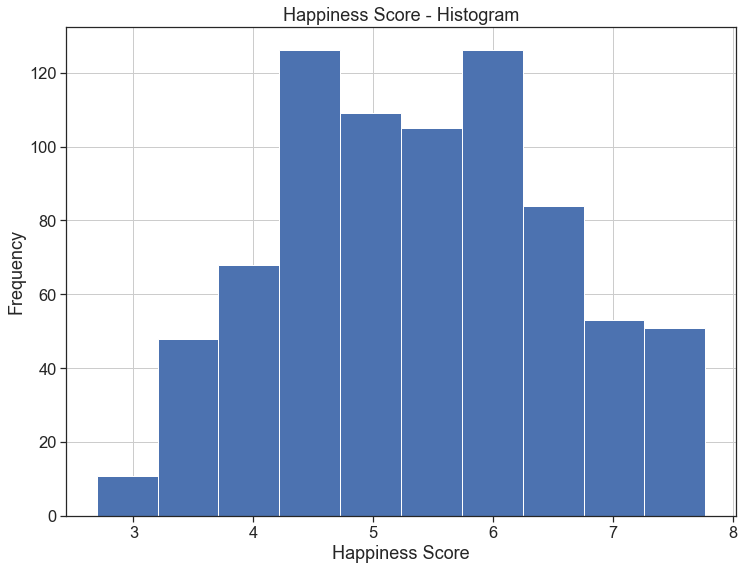

In [378]:
score = df_num.Score.to_numpy()
fig, ax = plt.subplots(1,figsize=(12,9))
ax.hist(score)
ax.set_title("Happiness Score - Histogram")
ax.set(ylabel='Frequency')
ax.set(xlabel='Happiness Score')
ax.grid()
ax.axis('on')

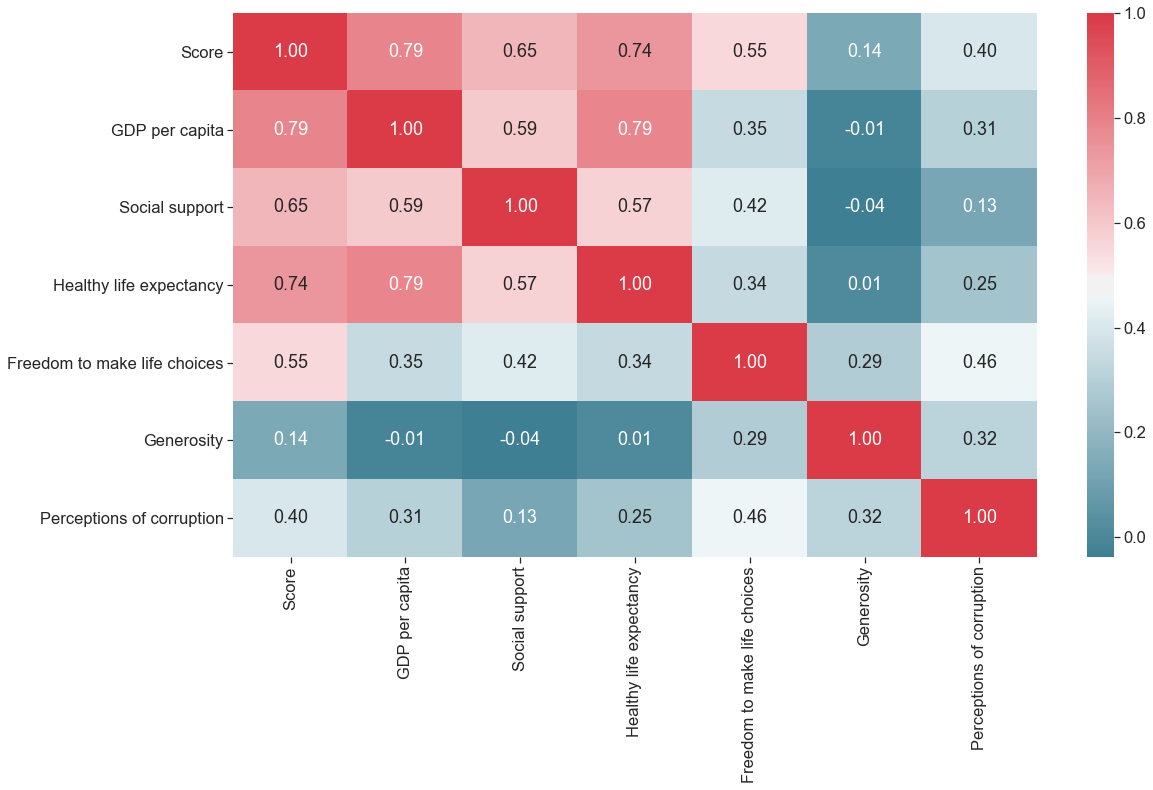

In [231]:
fig, ax1 = plt.subplots(1, figsize=(18, 10))
corr = df_num.corr()
sns.heatmap(corr, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, fmt=".2f")
sns.set(font_scale=1.5)

Considerando que el score toma valores en el rango de 0 a 10, puede notarse que la distribución de los datos aproxima a una normal, con media igual a 5.377232.
Para crear un clasificador que evalúe si un determinado conjunto de feactures tendrá un score superior 5, se crea una variable binaria denominada 'score_binary', y se la agrega al dataset como una nueva feacture.

(-0.05000000000000001, 1.05, 0.0, 507.15)

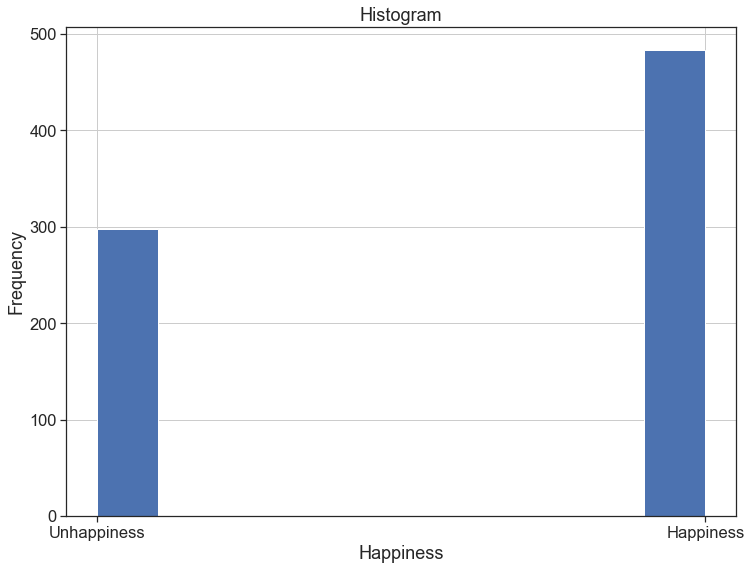

In [379]:
score_treshold = 5
df_num['score_binary'] = df_num.Score.apply(lambda label: 1 if (label > score_treshold) else 0)
score_binary = df_num.score_binary.to_numpy()

fig, ax = plt.subplots(1,figsize=(12,9))
ax.hist(df_num['score_binary'])
ax.set_title('Histogram')
ax.set(ylabel='Frequency')
ax.set(xlabel='Happiness')
ax.set_xticks([0, 1])
ax.set_xticklabels(['Unhappiness', 'Happiness'])
ax.grid()
ax.axis('on')

[Text(0, 0, 'GDP per capita'),
 Text(0, 0, 'Social support'),
 Text(0, 0, 'Healthy life expectancy')]

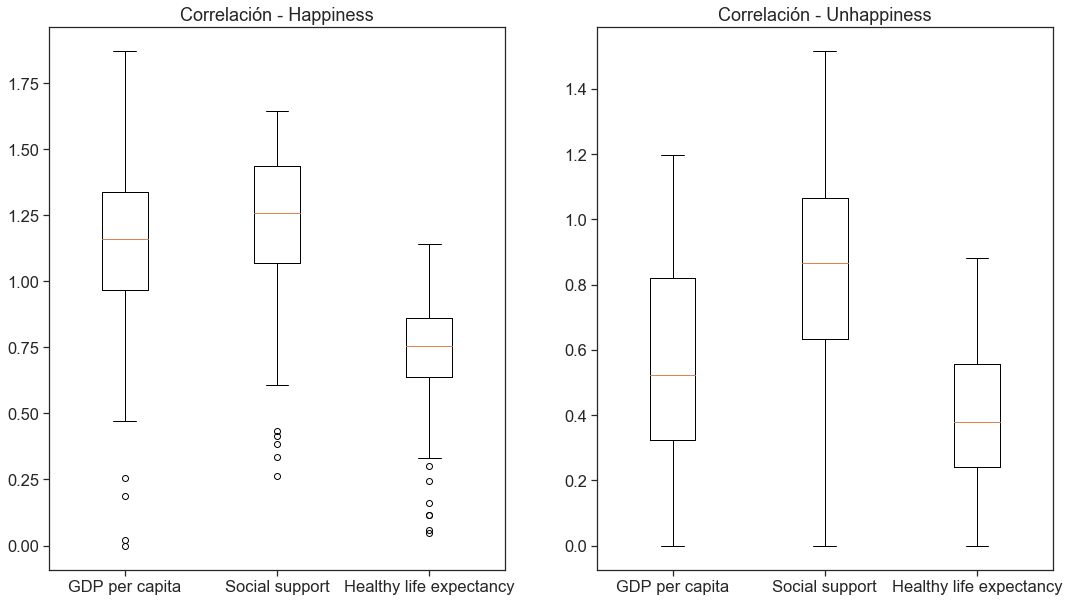

In [271]:
# bloxplot de las variables con mayor correlacion con el score_binary
corr = ['GDP per capita','Social support','Healthy life expectancy']

corr_plots_happy = []
corr_plots_unhappy = []

for x in corr:
    corr_plots_happy.append(df_num.loc[df_num['score_binary']==1,x])
    corr_plots_unhappy.append(df_num.loc[df_num['score_binary']==0,x])
    
fig, axes = plt.subplots(1,2, figsize=(18,10))

axes[0].set_title("Correlación - Happiness")
axes[0].boxplot( corr_plots_happy )
axes[0].set_xticklabels(corr)

axes[1].set_title("Correlación - Unhappiness")
axes[1].boxplot(corr_plots_unhappy )
axes[1].set_xticklabels(corr)

In [272]:
# Conformación del dataset, eliminando las feactures a predecir ('Score' y 'score_binary')

final_dataset = df_num.drop(['Score', 'score_binary'], axis = 1, inplace = False)
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 781 entries, 0 to 155
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GDP per capita                781 non-null    float64
 1   Social support                781 non-null    float64
 2   Healthy life expectancy       781 non-null    float64
 3   Freedom to make life choices  781 non-null    float64
 4   Generosity                    781 non-null    float64
 5   Perceptions of corruption     781 non-null    float64
dtypes: float64(6)
memory usage: 42.7 KB


In [275]:
# Normalizacion de los datos

min_max_scaler = preprocessing.MinMaxScaler()

final_dataset_norm = min_max_scaler.fit_transform(final_dataset)

print(final_dataset_norm.min())
print(final_dataset_norm.max())

0.0
1.0


In [381]:
# Se divide el dataset en training (70%), validation (20%) y testing (10%).

n_samples = final_dataset_norm.shape[0]
indexes = np.random.permutation(np.arange(0, n_samples))
train_idx = indexes[0:int(0.7*n_samples)]
validation_idx = indexes[int(0.7*n_samples): int(0.9*n_samples)]
test_idx = indexes[int(0.9*n_samples):]
assert n_samples == train_idx.size + validation_idx.size + test_idx.size

y = score
y_binary = score_binary

x_train_norm = final_dataset_norm[train_idx,:]
y_train = y[train_idx]
y_binary_train = y_binary[train_idx]

x_validation_norm = final_dataset_norm[validation_idx,:]
y_validation = y[validation_idx]
y_binary_validation = y_binary[validation_idx]

x_test_norm = final_dataset_norm[test_idx, :]
y_test = y[test_idx]
y_binary_test = y_binary[test_idx]

# CLASIFICADOR
## Modelo base

Se entrena un modelo base que siempre de como predicción un valor random, y luego se calcula el
AUC de este modelo.

In [382]:
class RandomModel(object):

    def fit(self, X, y):
        return None

    def predict(self, X):
        return np.random.randint(0,1, size=X.shape[0])

In [383]:
random_model = RandomModel()
random_model.fit(x_train_norm, y_binary_train)
rm_predictions = random_model.predict(x_validation_norm)

In [384]:
fpr, tpr, thresholds = metrics.roc_curve(y_binary_validation, rm_predictions)
print('AUC = {}'.format(metrics.auc(fpr, tpr)))

AUC = 0.5


## Regresión logísica

Se entrena un modelo de regresión logística que sea mejor que el modelo base.

In [385]:
lr_model = LogisticRegression(C=1, solver='sag', max_iter=1000)
lr_model.fit(x_train_norm, y_binary_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [386]:
lr_prediction = lr_model.predict(x_validation_norm)
fpr, tpr, thresholds = metrics.roc_curve(y_binary_validation, lr_prediction)
print('--------------------------------------------------------')
print('                  MÉTRICAS DEL MODELO')
print('--------------------------------------------------------')
print(metrics.classification_report(y_binary_validation, lr_prediction))
print('AUC = {}'.format(metrics.auc(fpr, tpr)))

print('--------------------------------------------------------')
print('            MATRIZ DE CONFUSION DEL MODELO')
print('--------------------------------------------------------')
print(pd.crosstab(y_binary_validation, rf_prediction, rownames=['REAL'], colnames=['PREDICCION']))

--------------------------------------------------------
                  MÉTRICAS DEL MODELO
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.82      0.86        49
           1       0.92      0.96      0.94       107

    accuracy                           0.92       156
   macro avg       0.91      0.89      0.90       156
weighted avg       0.92      0.92      0.92       156

AUC = 0.8894716765210757
--------------------------------------------------------
            MATRIZ DE CONFUSION DEL MODELO
--------------------------------------------------------
PREDICCION   0   1
REAL              
0           17  32
1           38  69


## Decision Tree Classifier

In [411]:
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=3, 
                                  min_samples_leaf=5) 

clf_gini.fit(x_train_norm, y_binary_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [412]:
clf_gini_prediction = clf_gini.predict(x_validation_norm)
fpr, tpr, thresholds = metrics.roc_curve(y_binary_validation, clf_gini_prediction)
print('--------------------------------------------------------')
print('                  MÉTRICAS DEL MODELO')
print('--------------------------------------------------------')
print(metrics.classification_report(y_binary_validation, clf_gini_prediction))
print('AUC = {}'.format(metrics.auc(fpr, tpr)))

print('--------------------------------------------------------')
print('            MATRIZ DE CONFUSION DEL MODELO')
print('--------------------------------------------------------')
print(pd.crosstab(y_binary_validation, clf_gini_prediction, rownames=['REAL'], colnames=['PREDICCION']))

--------------------------------------------------------
                  MÉTRICAS DEL MODELO
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.73      0.82      0.77        49
           1       0.91      0.86      0.88       107

    accuracy                           0.85       156
   macro avg       0.82      0.84      0.83       156
weighted avg       0.85      0.85      0.85       156

AUC = 0.8380698073621973
--------------------------------------------------------
            MATRIZ DE CONFUSION DEL MODELO
--------------------------------------------------------
PREDICCION   0   1
REAL              
0           40   9
1           15  92


## Random forest
Se entrena un modelo de Random Forest que sea mejor que el modelo base.

In [387]:
rf_model = RandomForestClassifier(random_state      = 1,     # semilla inicial de aleatoriedad del algoritmo
                                  n_estimators      = 100,   # cantidad de árboles a crear
                                  min_samples_split = 2,     # cantidad minima de observaciones para dividir un nodo
                                  min_samples_leaf  = 1,     # observaciones minimas que puede tener una hoja del arbol
                                  n_jobs            = 1,     # tareas en paralelo. para todos los cores disponibles usar -1
                                  criterion         = 'gini' # 
                                 )

rf_model.fit(x_train_norm, y_binary_train)

rf_prediction = rf_model.predict(x_validation_norm)
fpr, tpr, thresholds = metrics.roc_curve(y_binary_validation, rf_prediction)

In [388]:
print('--------------------------------------------------------')
print('                  MÉTRICAS DEL MODELO')
print('--------------------------------------------------------')
print(metrics.classification_report(y_binary_validation, rf_prediction))
print('AUC = {}'.format(metrics.auc(fpr, tpr)))

print('--------------------------------------------------------')
print('            MATRIZ DE CONFUSION DEL MODELO')
print('--------------------------------------------------------')
print(pd.crosstab(y_binary_validation, rf_prediction, rownames=['REAL'], colnames=['PREDICCION']))

--------------------------------------------------------
                  MÉTRICAS DEL MODELO
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        49
           1       0.95      0.95      0.95       107

    accuracy                           0.94       156
   macro avg       0.93      0.93      0.93       156
weighted avg       0.94      0.94      0.94       156

AUC = 0.9256151058554263
--------------------------------------------------------
            MATRIZ DE CONFUSION DEL MODELO
--------------------------------------------------------
PREDICCION   0    1
REAL               
0           44    5
1            5  102


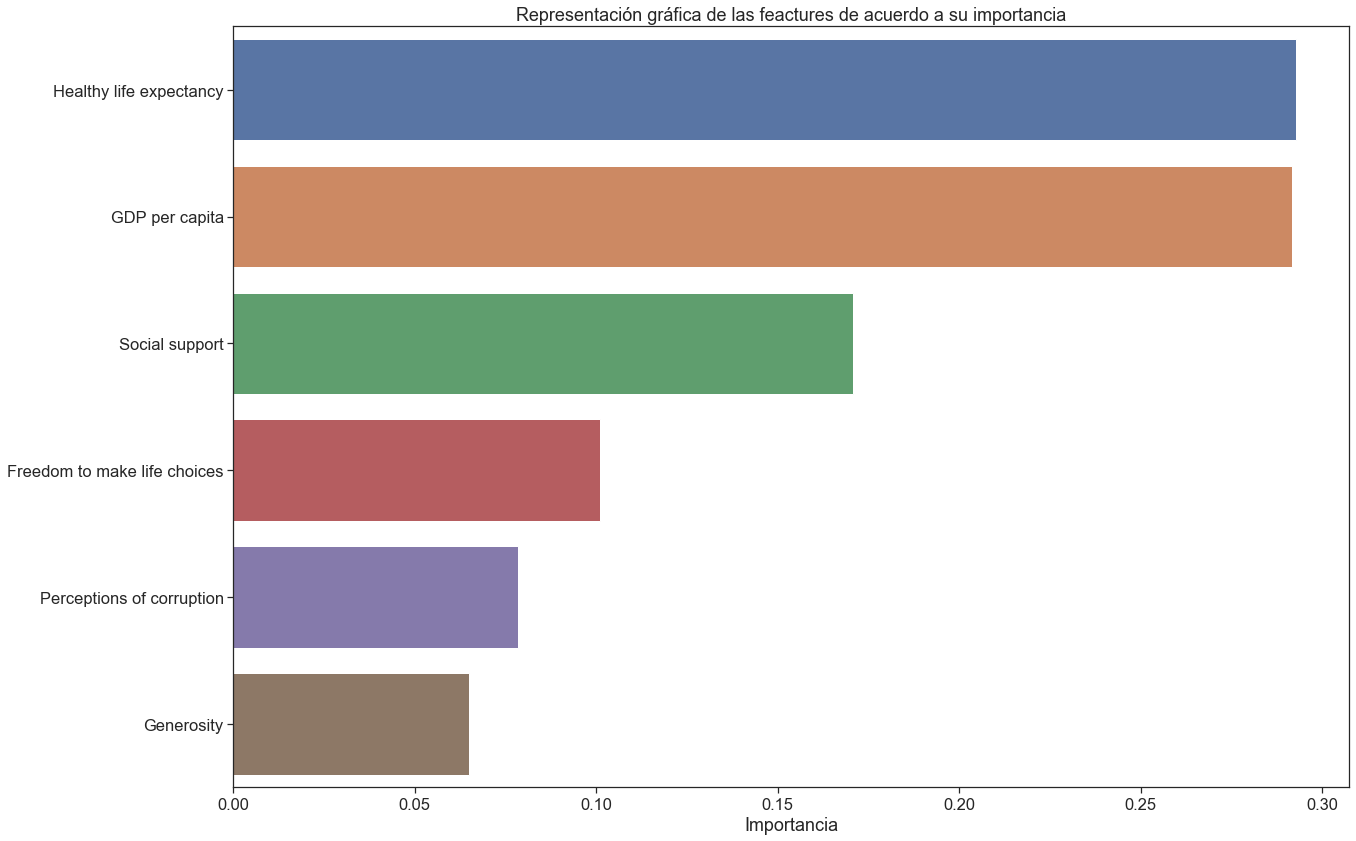

In [389]:
rf_model.fit(x_train_norm,y_binary_train)

feature_columns = final_dataset.columns

feature_imp = pd.Series(rf_model.feature_importances_,index=feature_columns).sort_values(ascending=False)

plt.figure(figsize=(20,14))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Importancia')
plt.title("Representación gráfica de las feactures de acuerdo a su importancia")
plt.show()

## Clustering

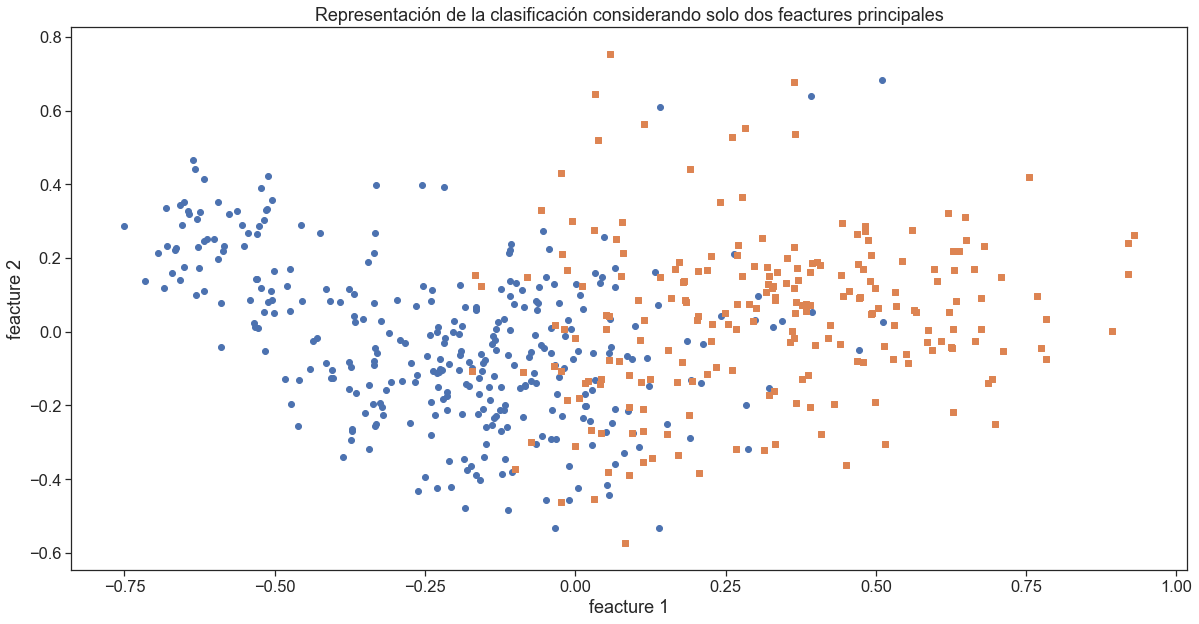

In [390]:
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train_norm)
x_test_pca = pca.fit_transform(x_test_norm)

x_train_pca_1 = x_train_pca[y_binary_train == 1]
x_train_pca_0 = x_train_pca[y_binary_train == 0]

plt.figure(figsize=(20,10))
plt.scatter(x_train_pca_1[:,0], x_train_pca_1[:,1],marker="o")
plt.scatter(x_train_pca_0[:,0], x_train_pca_0[:,1],marker="s")
plt.title('Representación de la clasificación considerando solo dos feactures principales')
plt.xlabel('feacture 1')
plt.ylabel('feacture 2')
plt.show()

In [391]:
# Función para graficar la región de desición

def plot_decision_regions(X,Y, model):
	# define bounds of the domain
    min1, max1 = X[:, 0].min()-0.1, X[:, 0].max()+0.1
    min2, max2 = X[:, 1].min()-0.1, X[:, 1].max()+0.1
    
    # define the x and y scale
    x1grid = np.arange(min1, max1, 0.1)
    x2grid = np.arange(min2, max2, 0.1)
    
    # create all of the lines and rows of the grid
    xx, yy = np.meshgrid(x1grid, x2grid)
    
    # flatten each grid to a vector
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
    
    # horizontal stack vectors to create x1,x2 input for the model
    grid = np.hstack((r1,r2))
    
    # make predictions for the grid
    yhat = model.predict(grid)
    
    # reshape the predictions back into a grid
    zz = yhat.reshape(xx.shape)
    
    # plot the grid of x, y and z values as a surface
    plt.figure(figsize=(20,10))
    plt.contourf(xx, yy, zz, cmap='Paired')
    
    # create scatter plot for samples from each class
    for class_value in range(2):
        # get row indexes for samples with this class
        row_ix = np.where(Y == class_value)
        # create scatter of these samples
        plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')

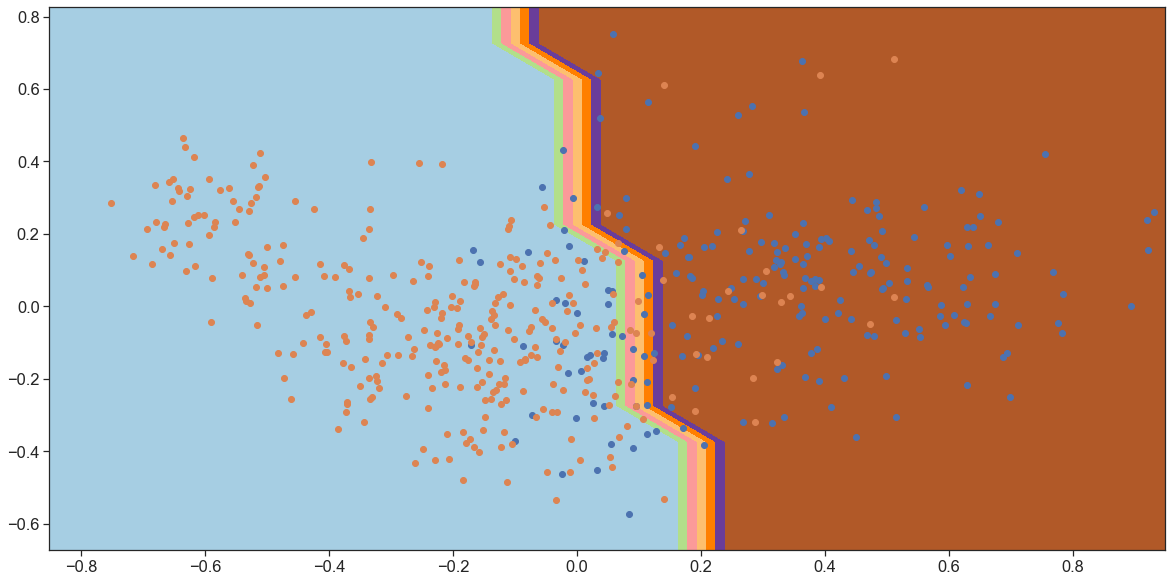

In [392]:
# K-Means

km_model = KMeans(n_clusters=2, random_state=100).fit(x_train_pca)
plot_decision_regions(x_train_pca,y_binary_train,km_model)

In [408]:
def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
  plt.figure()
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes)
  plt.yticks(tick_marks, classes)

  fmt = '.2f'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

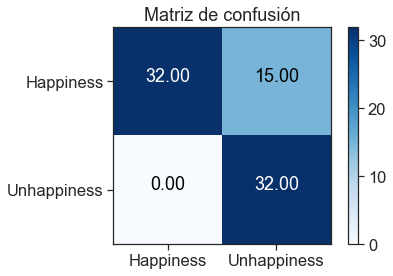

In [409]:
prediction = km_model.predict(x_test_pca)
cfn_matrix = confusion_matrix(y_binary_test, prediction, labels=[1,0])
plot_confusion_matrix(cfn_matrix, classes=['Happiness','Unhappiness'], title='Matriz de confusión')